In [1]:
10+10

20

In [2]:
import math

In [3]:
math.sqrt(20)

4.47213595499958

In [4]:
%%file modeling.scons

# Model with two spikes
Flow('model',None,
     '''
     spike n1=250 n2=50 nsp=2 k1=50,100 k2=40,10 |
     ricker1 frequency=10 | put v0=1 dv=0.1
     ''')

Flow('data','model','veltran adj=n x0=0.1 dx=0.01 nx=80')
Result('data','grey title=Data')

Writing modeling.scons


## Section

List

- One
- Two

Link: See [Madagascar](http://www.ahay.org)

## Explanation for the modeling part

We create a model in time-velocity space $(t_0,v)$, then we model data by spreading in time-diatance space $(t,x)$ over hyperbolas $t(x) = \sqrt{t_0^2 + \frac{x^2}{v^2}}$.

In [5]:
from m8r import view

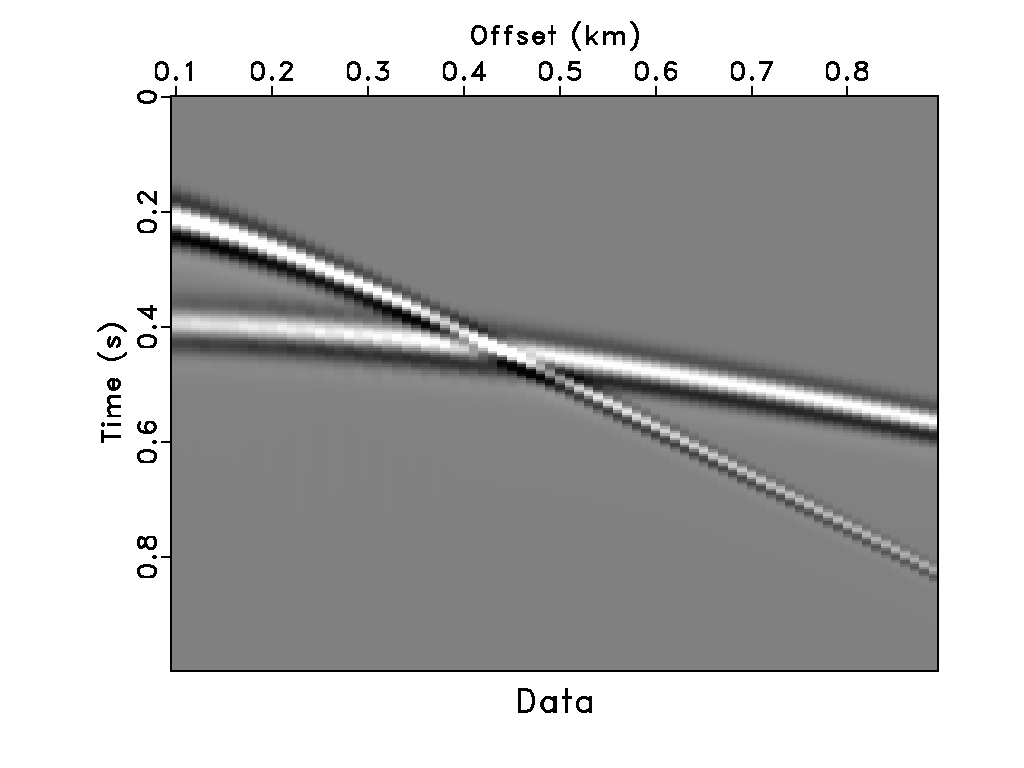

In [6]:
view('data')

Let us go back to thr time-velocity space.

If $\mathbf{L}$ is a linear operator, $\mathbf{L}^T$ is the adjoint operator.

The dot-product test is 

$\mathbf{d}^T\,\mathbf{L}\,\mathbf{m} = \mathbf{m}^T\,\mathbf{L}^T\,\mathbf{d}$



In [8]:
%%file adjoint.scons

Flow('tran','data','veltran adj=y nv=100')
Result('tran','grey title="Velocity Transform" ')

Writing adjoint.scons


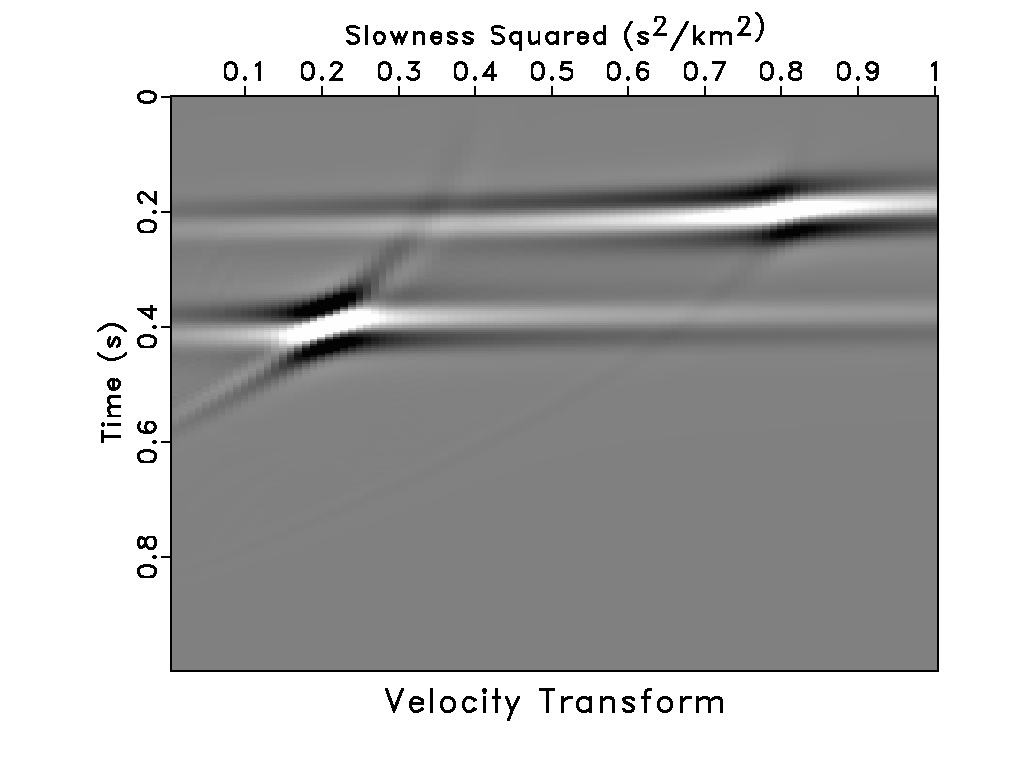

In [9]:
view('tran')

In [10]:
!ls

Fig            data.png       tran.png
SConstruct     data.rsf       tran.rsf
Untitled.ipynb model.rsf
adjoint.scons  modeling.scons


In [11]:
%%file mute.scons

Flow('data1','tran','cut max2=0.5 | veltran adj=n x0=0.1 dx=0.01 nx=80')
Result('data1','grey title=Noise')

Flow('data2','data data1','add scale=1,-1 ${SOURCES[1]}')
Result('data2','grey title=Signal')

Writing mute.scons


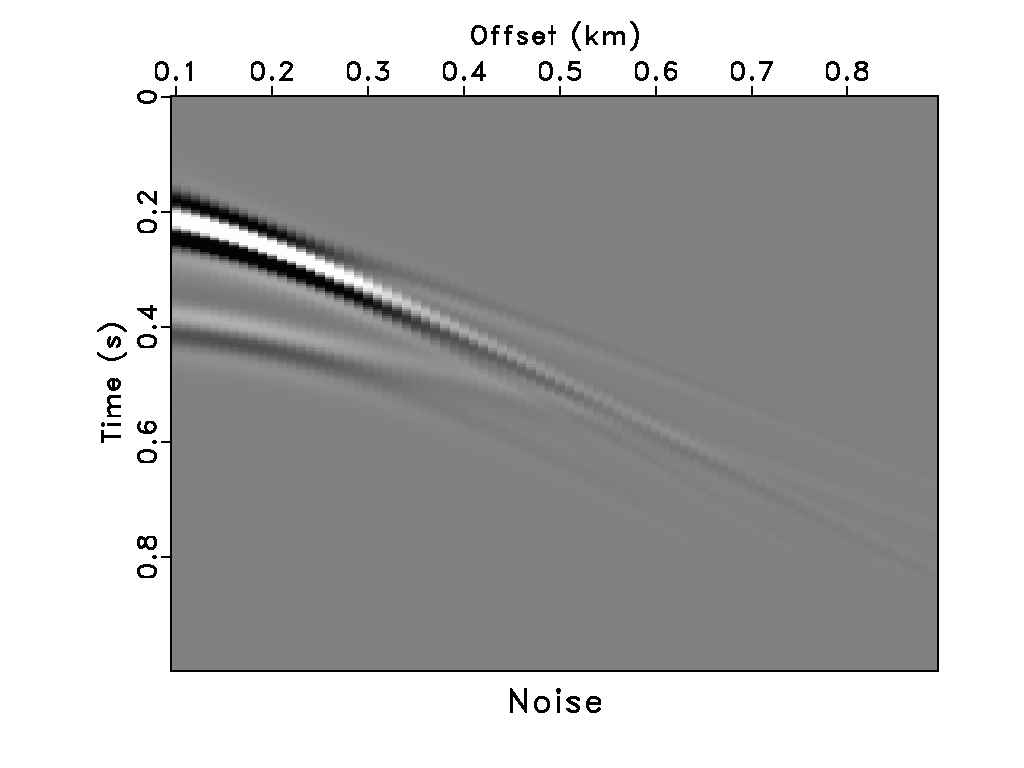

In [12]:
view('data1')

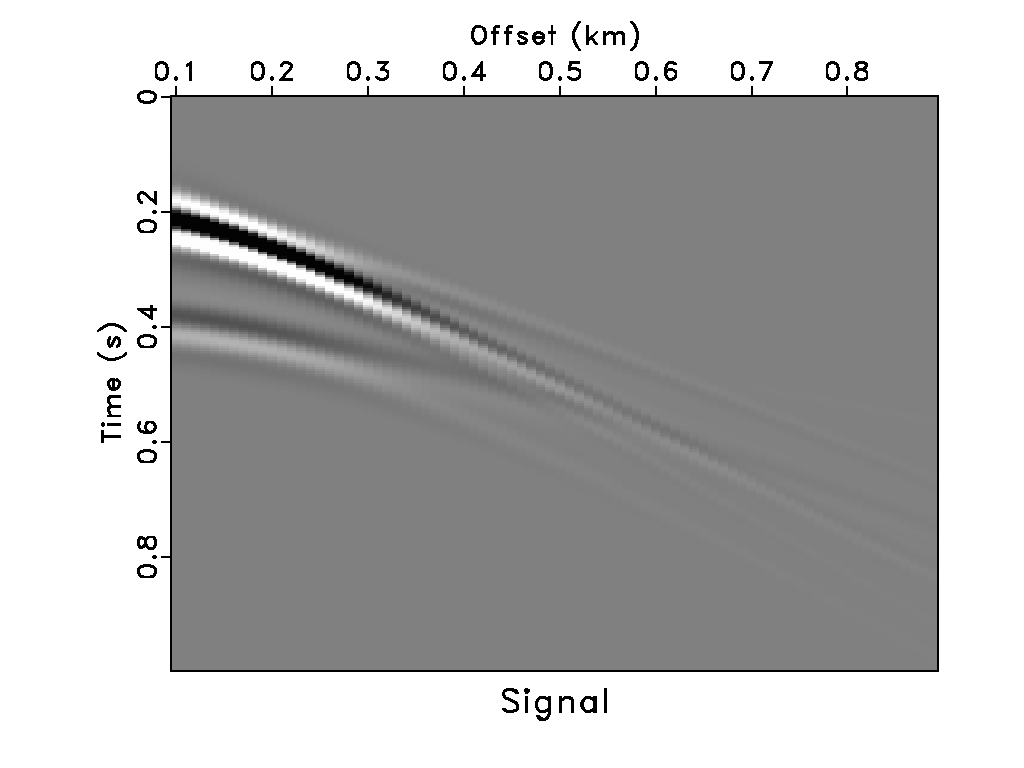

In [13]:
view('data2')

In [16]:
!sfdottest sfveltran nv=100 mod=tran.rsf dat=data.rsf

sfdottest:  L[m]*d=68864.5
sfdottest: L'[d]*m=68864.7


In [19]:
%%file inversion.scons

# Run inversion using Conjugate Gradients

Flow('inv','data tran',
     'conjgrad veltran mod=${SOURCES[1]} nv=100 niter=10')
Result('inv','grey title="Velocity Transform (Inverse)" ')

Flow('idata1','inv','cut max2=0.5 | veltran adj=n x0=0.1 dx=0.01 nx=80')
Result('idata1','grey title=Noise')

Flow('idata2','data idata1','add scale=1,-1 ${SOURCES[1]}')
Result('idata2','grey title=Signal')

Overwriting inversion.scons


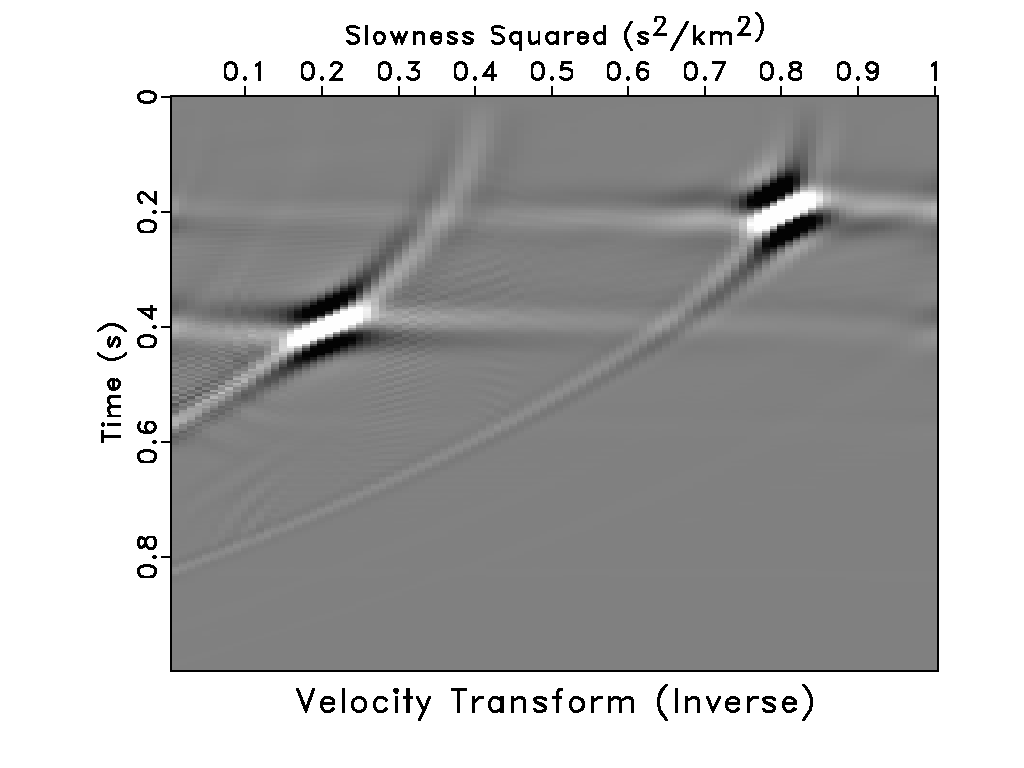

In [18]:
view('inv')

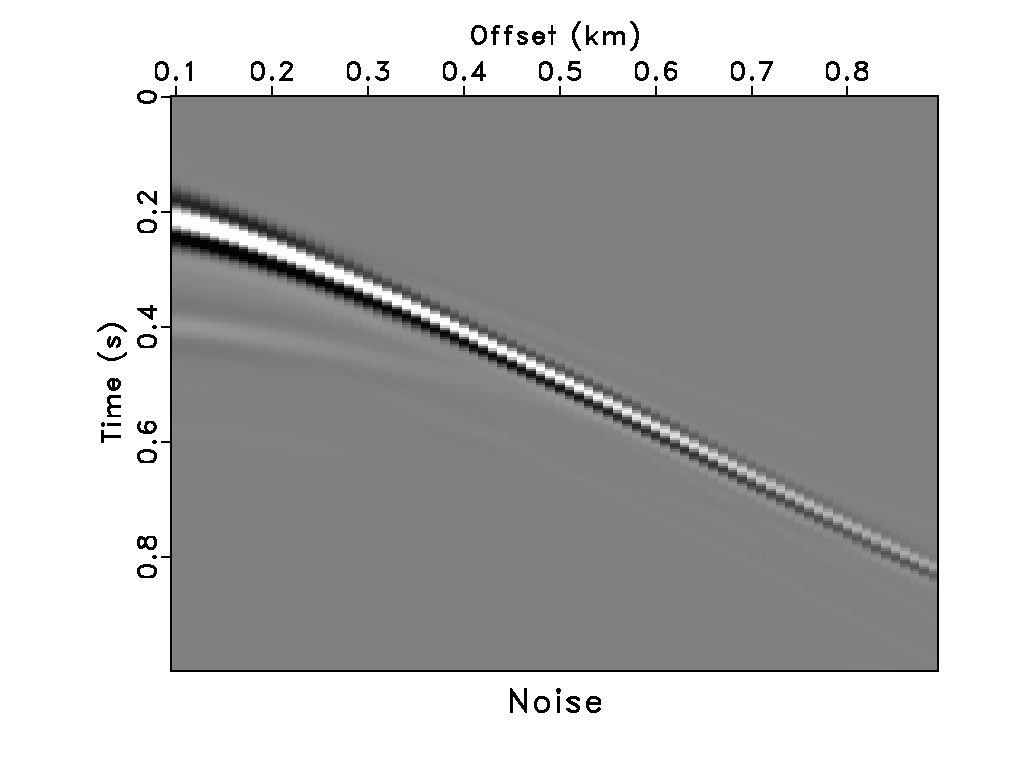

In [20]:
view('idata1')

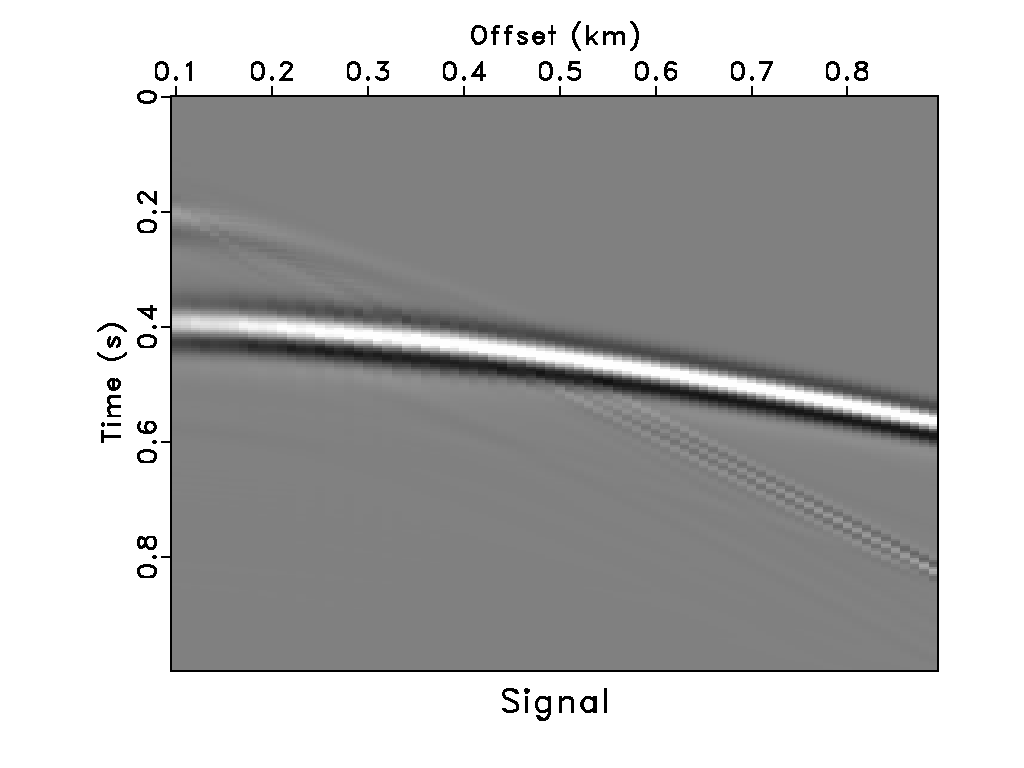

In [21]:
view('idata2')